# Importing The Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import odeint


# Importing The Dataset


In [2]:
dataset = pd.read_csv('Disease.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[: , -1].values

# Spliting The Dataset Into The Training Set And Test Set

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

# Training the Simple Linear Regression Model On The Training Set

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

# Predicting The Test Set Result

In [5]:
y_pred = regressor.predict(x_test)

# Visualising The Training Set Results

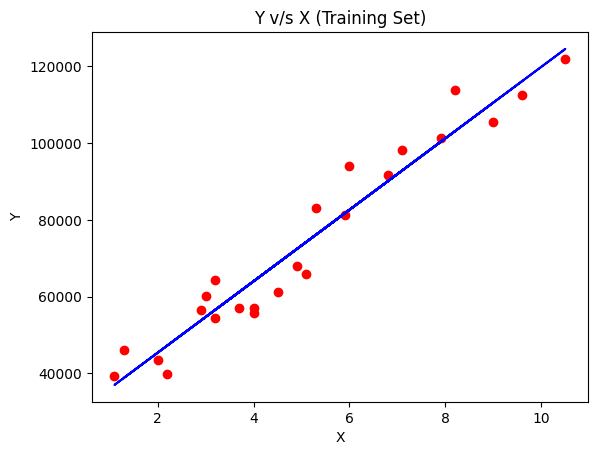

In [6]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color ='blue')
plt.title("Y v/s X (Training Set)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Visualising The Test Set Results

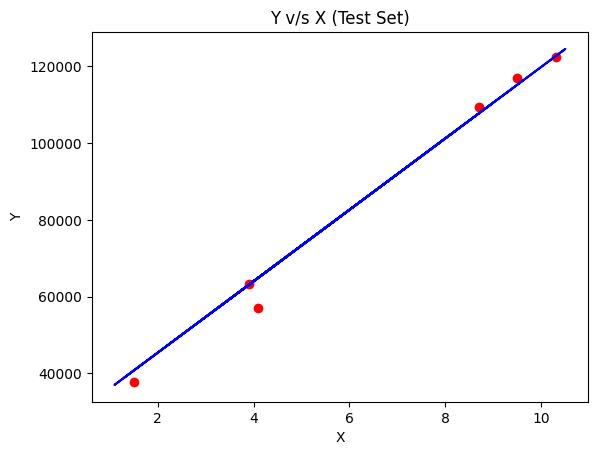

In [7]:
plt.scatter(x_test,y_test,color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title("Y v/s X (Test Set)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


# Final Regression Coefficient Values

In [8]:

#beta = 0.04
beta = (regressor.coef_)[0]
print(f"beta is going to be {beta}")

#gamma = 0.01
gamma = regressor.intercept_
print(f"gamma is going to be {gamma}")

beta is going to be 9312.575126729189
gamma is going to be 26780.09915062818


# #--------------SIR MODEL---------#

# Importing Packages From Python.

In [9]:
from scipy.integrate import odeint

Generating A Random Time Period Generator And Combining Probabilities

In [10]:
t = np.linspace(0,500, num=1000)
params = [beta, gamma]

# Defining SIM Function For Creating Ordinary Differential Equation

In [11]:
def sim(variables, t, params):
  S = variables [0]
  I = variables[1]
  R = variables[2]

  beta = params[0]
  gamma = params[1]

  N = S + I + R

  dSdt = -(beta* S * I)/ N
  dIdt = (beta * I *S) / N - (gamma* I)
  dRdt = gamma * I

  return ([dSdt, dIdt, dRdt])

Taking Intial Input From User For Solving ODE

In [12]:

a= int(input("Enter First Intial Value "))
b = int(input("Enter Second Intial Value "))
c = int(input("Enter Third Intial Value "))
y0 = [a,b,c]

Enter First Intial Value 100
Enter Second Intial Value 1
Enter Third Intial Value 0


# Applying Odeint Method from scipy.integrate to solve Ordinary Differential Equation

In [13]:
y = odeint(sim, y0, t, args = (params,) )

# Combine Plot

Text(0, 0.5, 'Susceptible [Blue], Infected [Orange], Rate[Green]')

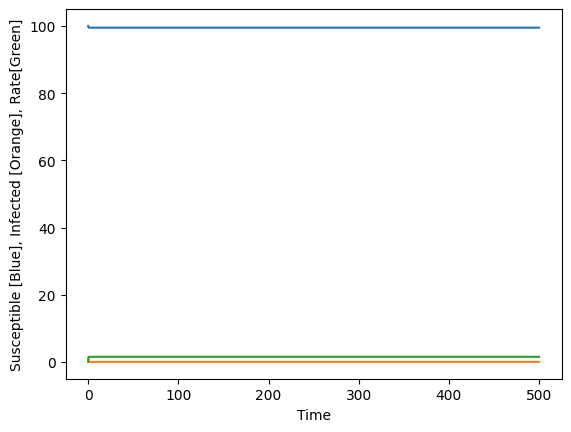

In [14]:
S = y.T[0]
I = y.T[1]
R = y.T[2]

plt.plot(t,S)
plt.plot(t, I)
plt.plot(t,R)
plt.xlabel("Time")
plt.ylabel("Susceptible [Blue], Infected [Orange], Rate[Green]")

# NOTE: You will get constant line graph because beta and gamma values obtained from data are different. Aditiionally slope of Linearly Increasing Line remains constant at different points.

# Grid Based Seperate Plots

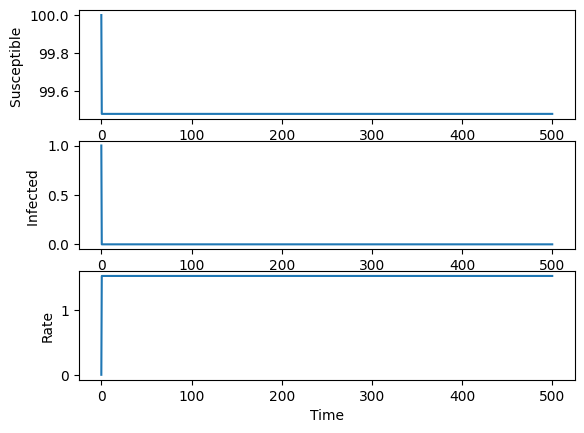

In [15]:
f, (ax1, ax2, ax3) = plt.subplots(3)

line1 = ax1.plot(t, y[:, 0])
line2 = ax2.plot(t, y[:,1])
line3 = ax3.plot(t, y[:,2])


ax1.set_ylabel("Susceptible ")
ax2.set_ylabel("Infected ")
ax3.set_ylabel("Rate")

ax3.set_xlabel("Time")

plt.show()